# JSON Based Data Exercise
#### Chuck Tucker

In [1]:
# import pandas and json packages
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

# run matplotlib inline
%matplotlib inline

In [2]:
# import the data as a dataframe
wbp = pd.read_json('../SB_Files/data_wrangling_json/data/world_bank_projects.json')

## Problem \#1: Find the 10 Countries with the Most Projects

In [3]:
# filter the dataframe to relevant information
df = wbp[['countryshortname', 'project_name']]

In [4]:
# find the top 10 countries with the most projects using groupby
top10 = df.groupby('countryshortname')['project_name'].count().sort_values(ascending=False).head(10)
top10

countryshortname
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
Name: project_name, dtype: int64

In [5]:
# clean up country label 'Yemen, Republic of' for graph format
xlabs = list(top10.index)
xlabs[4] = 'Yemen'

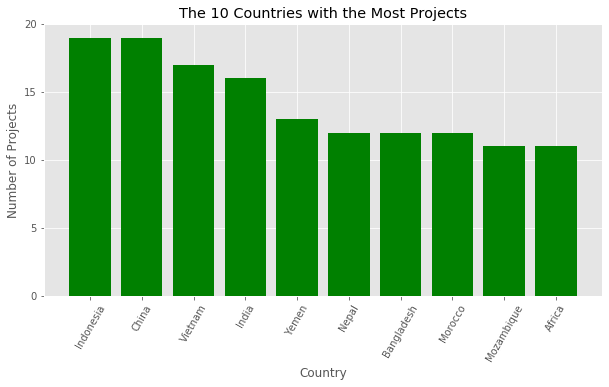

In [6]:
# format and display plot
plt.style.use('ggplot')
plt.bar(xlabs, top10, color='green')
plt.title('The 10 Countries with the Most Projects')
plt.xlabel('Country')
plt.ylabel('Number of Projects')
plt.ylim([0, 20])
plt.yticks([0, 5, 10, 15, 20])
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.xticks(rotation=60)
plt.show()

#### 1. Solution
- Indonesia and China had the most projects with Mozambique and Africa rounding out the top 10

## Problem \#2: Find the Top 10 Major Project Themes
### Also solves Problem \#3: Fill in the Missing 'name' Values

In [7]:
# get the data into a dataframe

# initialize empty lists for looping
list1 = []
list2 = []

# loop through the nested json info
for i in range(len(wbp.mjtheme_namecode)):
    for y in range(len(wbp.mjtheme_namecode[i])):
        x = json_normalize(wbp.mjtheme_namecode[i][y])
        
        # generate a list of codes (values of array dtype)
        list1.append(x['code'].values)
        
        # generate a list of names (values of array dtype)
        list2.append(x['name'].values)

In [8]:
# initialize empty lists for looping
list_codes = []
list_names = []

# extract values from array dtype
for i in range(len(list1)):
    list_codes.append(list1[i][0])
    list_names.append(list2[i][0])

# use lists to create a dictionary, then convert to dataframe
dict1 = {'code': list_codes, 'name': list_names}
df = pd.DataFrame(dict1)

# The Following Blocks of Code Solve Problem \#3

In [9]:
# there are missing values (problem #3)
# sort by code and set as the index

df = df.set_index('code').sort_index()

In [10]:
# iterate through each index and set the appropriate values

idx_vals = list(df.index.unique())

for i in idx_vals:
    # df[df.index == i].reset_index().sort_values('name', ascending=False).loc[0]['name']
    # subset the data to the specific code
    d = df[df.index == i]
    
    # reset the index and sort by name, to make sure the first name isn't blank
    d = d.reset_index().sort_values('name', ascending=False)
    
    # access the name for that code
    name = d.loc[0]['name']
    
    # assign that name to every instance of that index value
    df.name[df.index == i] = name

In [11]:
# complete dataframe with no missing names
df.name.unique()

array(['Economic management', 'Rural development',
       'Environment and natural resources management',
       'Public sector governance', 'Rule of law',
       'Financial and private sector development',
       'Trade and integration', 'Social protection and risk management',
       'Social dev/gender/inclusion', 'Human development',
       'Urban development'], dtype=object)

#### Back to problem \#2 with a clean/complete dataframe

In [12]:
# reset the index for groupby
df = df.reset_index()

In [13]:
# assign data to dataframe and format
mpt10 = df.groupby('name').count().sort_values('code', ascending=False).head(10)
mpt10.columns = ['count']
mpt10

,count
name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


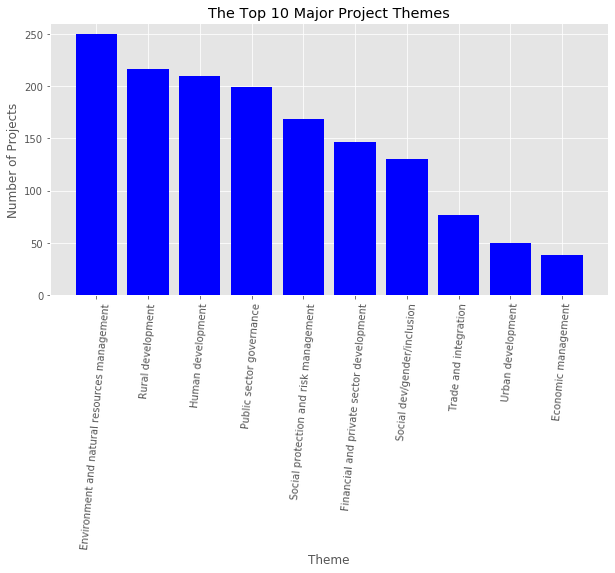

In [14]:
# format and display plot

xlabs1 = list(mpt10.index)
plt.style.use('ggplot')
plt.bar(xlabs1, mpt10['count'], color='blue')
plt.title('The Top 10 Major Project Themes')
plt.xlabel('Theme')
plt.ylabel('Number of Projects')
plt.ylim([0, 260])
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.xticks(rotation=85)

plt.show()

#### 2. Solution
- 'Environment and natural resources management' had the most projects, with economic management rounding out the top 10.

#### 3. Solution
- Incorporated into the code for the solution to \#2. This section is labeled.